STEP 1: LOAD IMAGES

In [1]:
!pip install  opencv-python
!pip install  opencv-contrib-python

In [2]:
import cv2
import matplotlib.pyplot as plt

In [30]:
image1 = cv2.imread('chaechae.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('chaeyoung-cute.jpg', cv2.IMREAD_GRAYSCALE)

STEP 2: EXTRAXCT KEYPOINTS AND DESCRIPTORS USING SIFT, SURF AND ORB

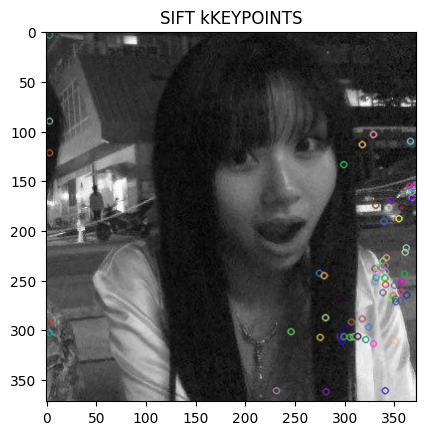

In [50]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image1, None)
keypoints, descriptors = sift.detectAndCompute(image2, None)

sift_keypoints_image = cv2.drawKeypoints(image1, keypoints1_sift, None)
sift_keypoints_image = cv2.drawKeypoints(image2, keypoints1_sift, None)

plt.imshow(cv2.cvtColor(sift_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT kKEYPOINTS')
plt.show()

In [46]:
!pip install opencv-contrib-python


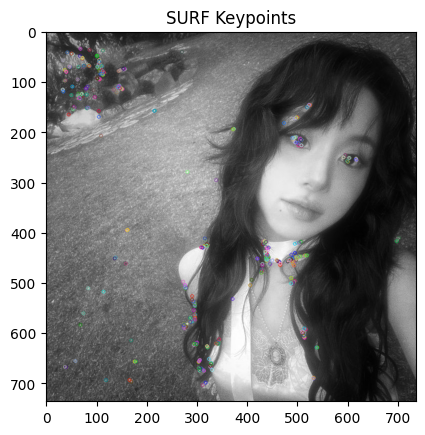

In [48]:
surf = cv2.ORB_create()
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(image1, None)
keypoints2_surf, descriptors2_surf = surf.detectAndCompute(image2, None)

surf_keypoints_image = cv2.drawKeypoints(image1, keypoints1_surf, None)
plt.imshow(cv2.cvtColor(surf_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SURF KEYPOINTS')
plt.show()

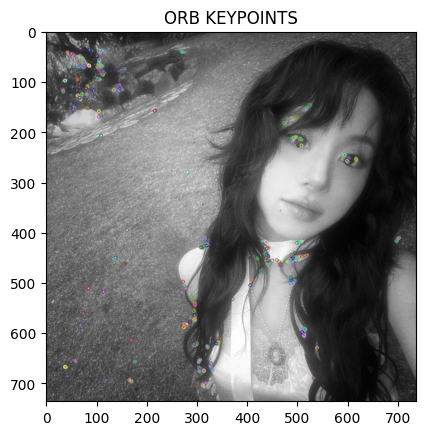

In [49]:
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

orb_keypoints_image = cv2.drawKeypoints(image1, keypoints1_orb, None)
plt.imshow(cv2.cvtColor(orb_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('ORB KEYPOINTS')
plt.show()

(-0.5, 735.5, 735.5, -0.5)

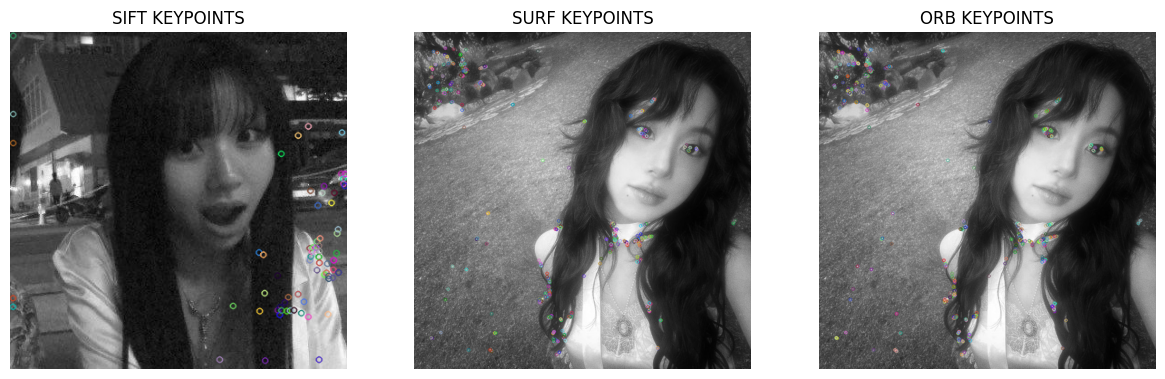

In [52]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(sift_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT KEYPOINTS')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(surf_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SURF KEYPOINTS')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(orb_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('ORB KEYPOINTS')
plt.axis('off')

STEP 3: FEATURE MATCHING W/ BRUTE-FORCE AND FLANN

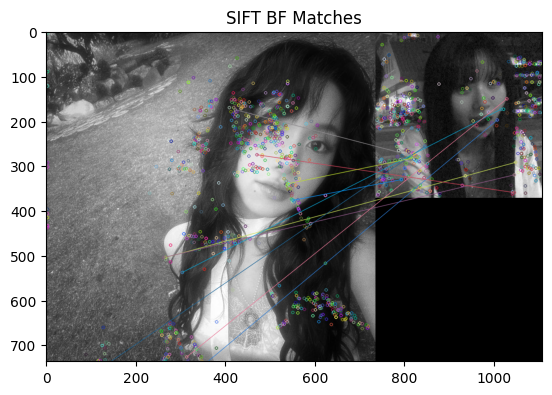

In [53]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift_bf = bf.match(descriptors1_sift, descriptors2_sift)
matches_sift_bf = sorted(matches_sift_bf, key=lambda x: x.distance)

sift_bf_img = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_bf[:10], None)
plt.imshow(cv2.cvtColor(sift_bf_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT BF Matches')
plt.show()

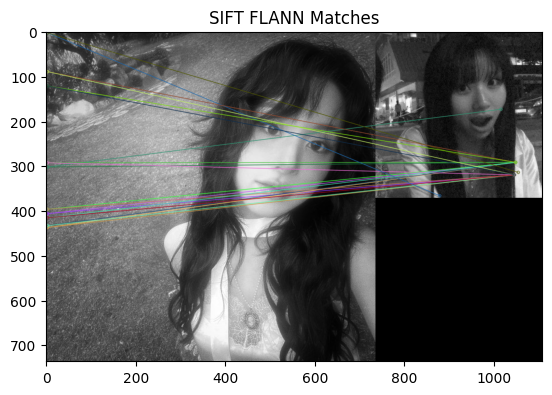

In [55]:
flann_index_kdtree = 1
index_params = dict(algorithm=flann_index_kdtree, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_sift_flann = flann.knnMatch(descriptors1_sift, descriptors2_sift, k = 2)

sift_flann_img = cv2.drawMatchesKnn(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_flann[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv2.cvtColor(sift_flann_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT FLANN Matches')
plt.show()

In [56]:
sift_bf_img = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_bf[:10], None)
cv2.imwrite('sift_bf_match.jpg', sift_bf_img)

sift_flann_img = cv2.drawMatchesKnn(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_flann[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite('sift_flann_match.jpg', sift_flann_img)

True

STEP 4: IMAGE ALIGNMENT USING HOMOGRAPHY

In [58]:
import numpy as np

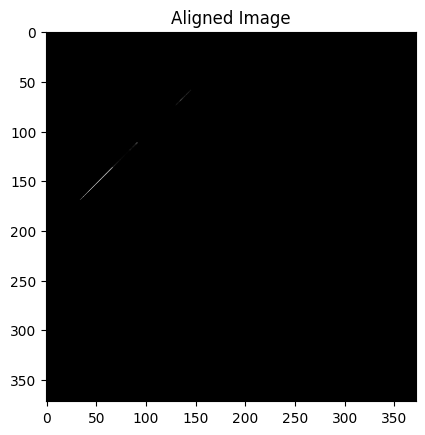

In [59]:
src_pts = np.float32([keypoints1_sift[m.queryIdx].pt for m in matches_sift_bf]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2_sift[m.trainIdx].pt for m in matches_sift_bf]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

aligned_image = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))
cv2.imwrite('aligned_image.jpg', aligned_image)

plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.show()

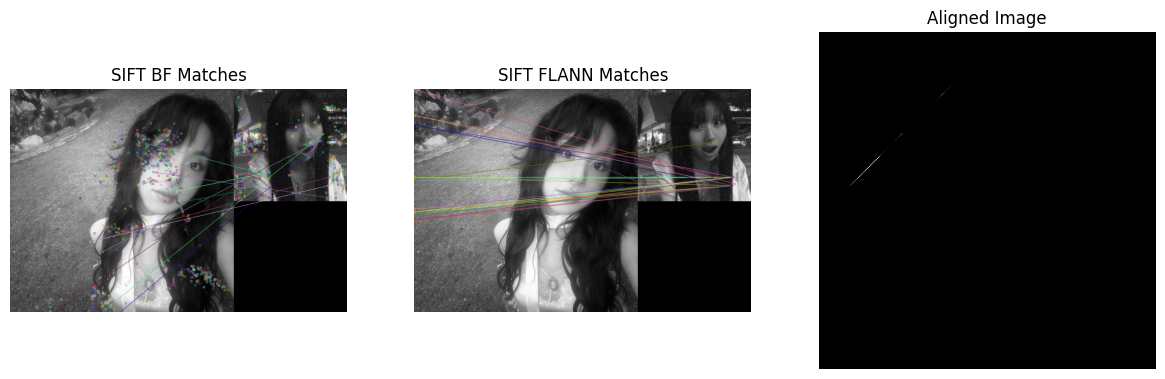

In [60]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(sift_bf_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT BF Matches')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(sift_flann_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT FLANN Matches')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.axis('off')


plt.show()